In [1]:
import mplsoccer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
from adjustText import adjust_text
from highlight_text import fig_text
import matplotlib.patches as patches

background = '#D7E5E5'
mpl.rcParams['font.family']= 'Calibri'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 20
mpl.rcParams['legend.fontsize'] = 17

In [2]:
df = pd.read_csv('../gca.csv', index_col='Rk')

In [3]:
df_pos = pd.read_excel('../Player Positions-FBRef format.xlsx')
df = pd.merge(df, df_pos, on='Player')

In [4]:
pos = ['Right-Back', 'Left-Back']
df = df[df['Position'].apply(lambda x: x in pos)]
df = df[df['90s']>=20]
df = df.drop_duplicates()

In [5]:
cutoff_pass = (df['PassLive']/df['90s']).quantile(0.95)
cutoff_dribb = (df['Drib']/df['90s']).quantile(0.95)
cutoff_both = ((df['PassLive']+df['Drib'])/df['90s']).quantile(0.90)

Text(0.15, 0.858, 'khatri_shreyas')

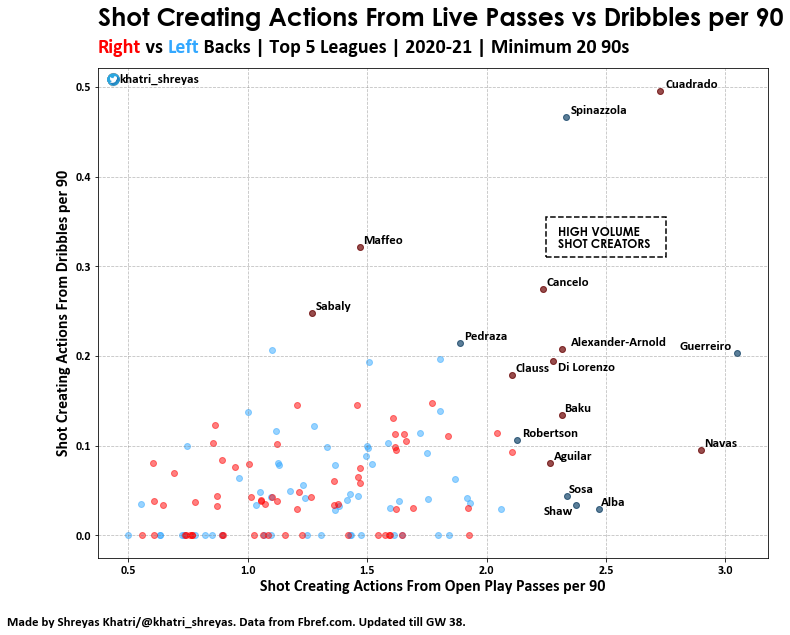

In [6]:
fig, ax = plt.subplots(figsize=(12,9))
#fig.set_facecolor(background)
#ax.patch.set_facecolor(background)
ax.grid(True, ls='--', c='gray', alpha=0.5)

df_fil = df[df['Position']=='Left-Back']
x, y = (df_fil['PassLive']/df_fil['90s']).to_list(), (df_fil['Drib']/df_fil['90s']).to_list()
ax.scatter(x, y, alpha = 0.5, c='#33A8FF')

df_fil = df[df['Position']=='Right-Back']
x, y = (df_fil['PassLive']/df_fil['90s']).to_list(), (df_fil['Drib']/df_fil['90s']).to_list()
ax.scatter(x, y, alpha = 0.5, c='red')

texts = []
for x, y, minutes, s in zip(df['PassLive'], df['Drib'], df['90s'], df['Player']):
    if len(s.split())==1:
        name = s
    else:
        name = ' '.join(s.split()[1:])
    if (x/minutes)>cutoff_pass or (y/minutes)>cutoff_dribb or ((x+y)/minutes)>cutoff_both:
        ax.scatter(x/minutes, y/minutes, c='black', alpha=0.4)
        texts.append(ax.text(x/minutes, y/minutes, name, fontdict=dict(color='black', size=13)))

adjust_text(texts,force_points=0.2, force_text=0.2,
            expand_points=(1.2, 1.2), expand_text=(1, 1),
            arrowprops=dict(arrowstyle = '-', lw=0.1, alpha = 0))

# ANNOTATION
rect = patches.Rectangle((2.25,0.31),0.5,0.045,ls='--', lw=1.5, edgecolor='black', fill=False)
ax.add_patch(rect)
ax.text(2.3,0.32, 'HIGH VOLUME\nSHOT CREATORS', size=12, family='Century Gothic')

fig.text(0.125,0.945,'Shot Creating Actions From Live Passes vs Dribbles per 90', size = 25, 
         weight='heavy', family='Century Gothic')
fig_text(0.125,0.925,'<Right> vs <Left> Backs | Top 5 Leagues | 2020-21 | Minimum 20 90s', 
         size = 20, weight='heavy', highlight_textprops=[{'color':'red'},{'color':'#33A8FF'}])

fig.text(0.02,0.02,'Made by Shreyas Khatri/@khatri_shreyas. Data from Fbref.com. Updated till GW 38.', size=13)

ax.set_xlabel('Shot Creating Actions From Open Play Passes per 90', size = 16, weight='bold')
ax.set_ylabel('Shot Creating Actions From Dribbles per 90', size = 16, weight='bold')

# TWITTER
ax2 = fig.add_axes([0.13,0.85,0.025,0.025])
ax2.axis('off')
img = plt.imread('twitter.png')
ax2.imshow(img)
fig.text(0.15,0.858,'khatri_shreyas', size=13, weight='bold')

#plt.savefig('SCA_FB',facecolor='white', dpi=300)